<a href="https://colab.research.google.com/github/kothapallypavithra/2095_DataAnalysis/blob/main/2203A52095_DAUP_PROJECT(AUDIO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Downloading

In [ ]:
from google.colab import files

# Upload kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavithrakothapally","key":"d2ed2e361e5fc61eff5f3c921d2cbfb8"}'}

In [ ]:
# Move kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
!unzip ravdess-emotional-speech-audio.zip -d ravdess_data


Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
Archive:  ravdess-emotional-speech-audio.zip
  inflating: ravdess_data/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: ravdess_data/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: ravdess_data/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: ravdess_data/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: ravdess_data/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: ravdess_data/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: ravdess_data/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: ravdess_data/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: ravdess_data/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: ravdess_data/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: ravdess_data/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: ravdess_data/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: ravdess_data/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: ravdess_data/Actor_0

 Step 1: Install & Import Required Libraries

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


Step 2: Load and Extract Features from Audio Files

In [ ]:
'''# Path to dataset
dataset_path = "/content/ravdess_data/audio_speech_actors_01-24"

X = []
y = []

# Loop through each actor folder
for actor_folder in os.listdir(dataset_path):
    actor_path = os.path.join(dataset_path, actor_folder)

    if not os.path.isdir(actor_path):
        continue  # Skip non-directory files

    # Loop through each audio file
    for file in os.listdir(actor_path):
        file_path = os.path.join(actor_path, file)

        if not file.endswith(".wav"):
            continue  # Skip non-audio files

        # Load audio
        audio, sr = librosa.load(file_path, sr=22050)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

        # Combine all features
        features = np.concatenate((mfccs.mean(axis=1), chroma.mean(axis=1), spectral_contrast.mean(axis=1)))

        # Extract emotion label (3rd number in filename)
        emotion = int(file.split("-")[2])

        # Append to dataset
        X.append(features)
        y.append(emotion)

print("Total samples:", len(X))
'''

'# Path to dataset\ndataset_path = "/content/ravdess_data/audio_speech_actors_01-24"\n\nX = []\ny = []\n\n# Loop through each actor folder\nfor actor_folder in os.listdir(dataset_path):\n    actor_path = os.path.join(dataset_path, actor_folder)\n\n    if not os.path.isdir(actor_path):\n        continue  # Skip non-directory files\n\n    # Loop through each audio file\n    for file in os.listdir(actor_path):\n        file_path = os.path.join(actor_path, file)\n\n        if not file.endswith(".wav"):\n            continue  # Skip non-audio files\n\n        # Load audio\n        audio, sr = librosa.load(file_path, sr=22050)\n\n        # Extract MFCC features\n        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)\n        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)\n        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)\n\n        # Combine all features\n        features = np.concatenate((mfccs.mean(axis=1), chroma.mean(axis=1), spectral_contrast.m

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
from collections import Counter

# Function to add Gaussian noise
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio)) * noise_level
    return audio + noise

# Path to dataset
dataset_path = "/content/ravdess_data/audio_speech_actors_01-24"

X = []
y = []
class_counts = Counter()

# Loop through each actor folder
for actor_folder in os.listdir(dataset_path):
    actor_path = os.path.join(dataset_path, actor_folder)

    if not os.path.isdir(actor_path):
        continue  # Skip non-directory files

    # Loop through each audio file
    for file in os.listdir(actor_path):
        file_path = os.path.join(actor_path, file)

        if not file.endswith(".wav"):
            continue  # Skip non-audio files

        # Load audio
        audio, sr = librosa.load(file_path, sr=22050)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

        # Combine all features
        features = np.concatenate((mfccs.mean(axis=1), chroma.mean(axis=1), spectral_contrast.mean(axis=1)))

        # Extract emotion label (3rd number in filename)
        emotion = int(file.split("-")[2])

        # Append to dataset
        X.append(features)
        y.append(emotion)
        class_counts[emotion] += 1

        # If class has fewer samples, augment with noise
        if class_counts[emotion] < 500:  # Adjust this threshold
            audio_noisy = add_noise(audio)
            mfccs_noisy = librosa.feature.mfcc(y=audio_noisy, sr=sr, n_mfcc=40)
            chroma_noisy = librosa.feature.chroma_stft(y=audio_noisy, sr=sr)
            spectral_contrast_noisy = librosa.feature.spectral_contrast(y=audio_noisy, sr=sr)

            features_noisy = np.concatenate((mfccs_noisy.mean(axis=1), chroma_noisy.mean(axis=1), spectral_contrast_noisy.mean(axis=1)))

            X.append(features_noisy)
            y.append(emotion)
            class_counts[emotion] += 1  # Update count after augmentation

print("Balanced Class Distribution:", class_counts)


Balanced Class Distribution: Counter({6: 384, 7: 384, 5: 384, 4: 384, 8: 384, 2: 384, 3: 384, 1: 192})


 Convert Data to NumPy Arrays & Encode Labels

In [ ]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)  # Convert to one-hot encoding

# Reshape for LSTM (samples, timesteps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (2304, 1, 59) (2304, 8)
Test shape: (576, 1, 59) (576, 8)


 Step 4: Build an Improved LSTM Model

In [ ]:
# Define LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer (number of emotion classes)
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          96,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,296 (626.16 KB)

 Trainable params: 159,848 (624.41 KB)

 Non-trainable params: 448 (1.75 KB)

ADDITIONAL 2 LAYERS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(128, return_sequences=True),  # First additional LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),  # Second additional LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64),  # Final LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(8, activation='softmax')  # Output layer (8 classes for emotions)
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 1, 128)              │          96,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 1, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 1, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 314,152 (1.20 MB)

 Trainable params: 313,384 (1.20 MB)

 Non-trainable params: 768 (3.00 KB)

Step 5: Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.1261 - loss: 2.5522 - val_accuracy: 0.1389 - val_loss: 2.0771
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1847 - loss: 2.1623 - val_accuracy: 0.1771 - val_loss: 2.0267
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1956 - loss: 2.0652 - val_accuracy: 0.1771 - val_loss: 2.0458
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1992 - loss: 2.0215 - val_accuracy: 0.2014 - val_loss: 1.9277
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2257 - loss: 1.9671 - val_accuracy: 0.2778 - val_loss: 1.8234
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2389 - loss: 1.9460 - val_accuracy: 0.2552 - val_loss: 1.8585
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2638 - loss: 1.8994 - val_accuracy: 0.2274 - val_loss: 1.9044
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2699 - loss: 1.8509 - val_acc


 Evaluate the Model

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3615 - loss: 1.6032
Test Accuracy: 37.15%


Install and Import the Required Library

In [ ]:
'''from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score'''


'from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score'

Evaluate the Model with F1-Score and Other Metrics

AFTER BALANCING

Balanced Class Distribution (Initial Augmentation): Counter({6: 192, 7: 192, 5: 192, 4: 192, 8: 192, 2: 192, 3: 192, 1: 96})
Final Balanced Class Distribution: Counter({6: 192, 7: 192, 5: 192, 1: 192, 4: 192, 8: 192, 2: 192, 3: 192})


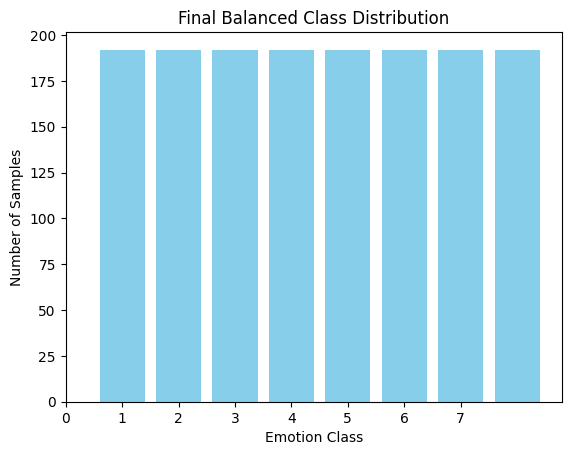

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from collections import Counter

# Function to add Gaussian noise
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio)) * noise_level
    return audio + noise

# Path to dataset
dataset_path = "/content/ravdess_data/audio_speech_actors_01-24"

X = []
y = []
class_counts = Counter()

# Storing file paths based on emotion labels
emotion_files = {}

# Loop through each actor folder
for actor_folder in os.listdir(dataset_path):
    actor_path = os.path.join(dataset_path, actor_folder)

    if not os.path.isdir(actor_path):
        continue  # Skip non-directory files

    # Loop through each audio file
    for file in os.listdir(actor_path):
        file_path = os.path.join(actor_path, file)

        if not file.endswith(".wav"):
            continue  # Skip non-audio files

        # Extract emotion label (3rd number in filename)
        emotion = int(file.split("-")[2])

        # Store file path for later balancing
        if emotion not in emotion_files:
            emotion_files[emotion] = []
        emotion_files[emotion].append(file_path)

        # Load audio
        audio, sr = librosa.load(file_path, sr=22050)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

        # Combine all features
        features = np.concatenate((mfccs.mean(axis=1), chroma.mean(axis=1), spectral_contrast.mean(axis=1)))

        # Append to dataset
        X.append(features)
        y.append(emotion)
        class_counts[emotion] += 1

print("Balanced Class Distribution (Initial Augmentation):", class_counts)

# Set target sample count for all classes
TARGET_SAMPLES = max(class_counts.values())

# Further balance the dataset by adding noise to underrepresented classes
for emotion in class_counts.keys():
    while class_counts[emotion] < TARGET_SAMPLES:
        # Find an existing sample for this class
        if len(emotion_files[emotion]) == 0:
            continue  # Avoid errors if no files found

        file_path = np.random.choice(emotion_files[emotion])  # Choose random file from same emotion class
        audio, sr = librosa.load(file_path, sr=22050)

        # Apply noise
        audio_noisy = add_noise(audio)

        # Extract features
        mfccs_noisy = librosa.feature.mfcc(y=audio_noisy, sr=sr, n_mfcc=40)
        chroma_noisy = librosa.feature.chroma_stft(y=audio_noisy, sr=sr)
        spectral_contrast_noisy = librosa.feature.spectral_contrast(y=audio_noisy, sr=sr)

        features_noisy = np.concatenate((mfccs_noisy.mean(axis=1), chroma_noisy.mean(axis=1), spectral_contrast_noisy.mean(axis=1)))

        # Append to dataset
        X.append(features_noisy)
        y.append(emotion)
        class_counts[emotion] += 1  # Update count

print("Final Balanced Class Distribution:", class_counts)

# Plot the final class distribution
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Emotion Class")
plt.ylabel("Number of Samples")
plt.title("Final Balanced Class Distribution")
plt.xticks(range(len(class_counts)))
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert lists to NumPy arrays
# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y) # Assuming y contains original emotion labels (not one-hot encoded)

# If y is one-hot encoded, convert it back to class labels
if y.ndim > 1:
    y = np.argmax(y, axis=1)  # Convert one-hot to categorical labels

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Apply LabelEncoder
y_one_hot = tf.keras.utils.to_categorical(y_encoded)  # One-hot encoding again



# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Reshape input for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build an optimized LSTM model
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, activation='tanh'), input_shape=(1, X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.4),

    Bidirectional(LSTM(128, return_sequences=True, activation='tanh')),
    BatchNormalization(),
    Dropout(0.4),

    Bidirectional(LSTM(64, return_sequences=True, activation='tanh')),
    BatchNormalization(),
    Dropout(0.3),

    GlobalAveragePooling1D(),  # Better than flattening
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(y_one_hot.shape[1], activation='softmax')
])

# Compile model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.1807 - loss: 2.7919 - val_accuracy: 0.1461 - val_loss: 2.0893 - learning_rate: 0.0010
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2495 - loss: 2.3160 - val_accuracy: 0.1266 - val_loss: 2.1062 - learning_rate: 0.0010
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2881 - loss: 1.9944 - val_accuracy: 0.1266 - val_loss: 2.1157 - learning_rate: 0.0010
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2846 - loss: 2.0446 - val_accuracy: 0.1266 - val_loss: 2.0901 - learning_rate: 0.0010
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2941 - loss: 1.9235 - val_accuracy: 0.1299 - val_loss: 2.0513 - learning_rate: 0.0010
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3272 - loss: 1.8409 - val_accuracy: 0.2468 - val_loss: 1.9437 - learning_rate: 0.0010
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3604 - loss: 1.7476 - 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, GlobalAveragePooling1D, Attention, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y) # Assuming y contains original emotion labels (not one-hot encoded)

# If y is one-hot encoded, convert it back to class labels
if y.ndim > 1:
    y = np.argmax(y, axis=1)  # Convert one-hot to categorical labels

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Apply LabelEncoder
y_one_hot = tf.keras.utils.to_categorical(y_encoded)  # One-hot encoding again

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Reshape input for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build an optimized LSTM model with Attention
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))  # Define input layer

# First Bidirectional LSTM layer
x = Bidirectional(LSTM(256, return_sequences=True, activation='tanh'))(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# Second Bidirectional LSTM layer
x = Bidirectional(LSTM(128, return_sequences=True, activation='tanh'))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# Third Bidirectional LSTM layer
x = Bidirectional(LSTM(64, return_sequences=True, activation='tanh'))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Attention Mechanism: Applying attention to focus on important parts of the sequence
attention = Attention()([x, x])
x = GlobalAveragePooling1D()(attention)

# Dense layers
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Output layer
output_layer = Dense(y_one_hot.shape[1], activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.1767 - loss: 2.7001 - val_accuracy: 0.1266 - val_loss: 2.0958 - learning_rate: 0.0010
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2611 - loss: 2.2142 - val_accuracy: 0.1266 - val_loss: 2.1277 - learning_rate: 0.0010
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2851 - loss: 2.0219 - val_accuracy: 0.1266 - val_loss: 2.1348 - learning_rate: 0.0010
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3058 - loss: 1.9191 - val_accuracy: 0.1721 - val_loss: 2.1424 - learning_rate: 0.0010
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3141 - loss: 1.8221 - val_accuracy: 0.1558 - val_loss: 2.1579 - learning_rate: 0.0010
Epoch 6/100
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3556 - loss: 1.7107
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3553 - loss: 1.7127 - val_accuracy:

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
📌 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.54      0.65        39
           1       0.51      0.91      0.65        32
           2       0.64      0.62      0.63        34
           3       0.58      0.49      0.53        39
           4       0.84      0.69      0.76        39
           5       0.64      0.62      0.63        37
           6       0.67      0.54      0.60        48
           7       0.62      0.80      0.70        40

    accuracy                           0.64       308
   macro avg       0.66      0.65      0.64       308
weighted avg       0.67      0.64      0.64       308



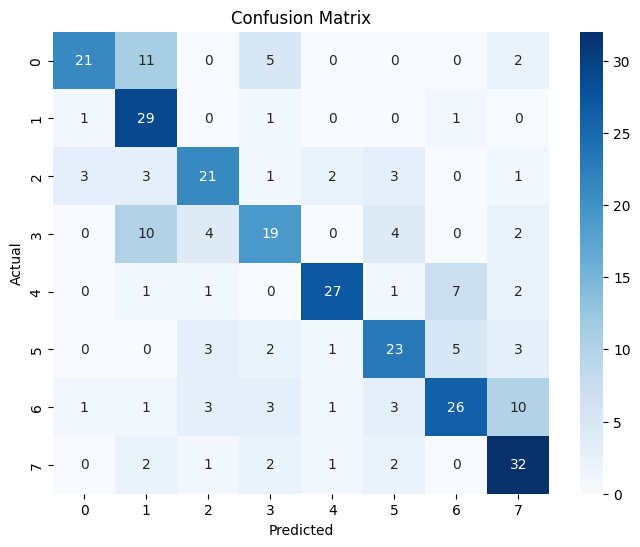


🔹 Type I Errors (False Positives): [0.01858736 0.10144928 0.04379562 0.05204461 0.01858736 0.04797048
 0.05       0.07462687]
🔹 Type II Errors (False Negatives): [0.46153846 0.09375    0.38235294 0.51282051 0.30769231 0.37837838
 0.45833333 0.2       ]

🔹 Class-wise Error Rate: [0.07467532 0.10064935 0.08116883 0.11038961 0.05519481 0.08766234
 0.11363636 0.09090909]

📊 ANOVA Test Results (F-statistic, p-value): F_onewayResult(statistic=np.float32(1.3205304), pvalue=np.float32(0.23617068))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Print classification report
print("📌 Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Print confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Calculate Type I & Type II Errors
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  # False Positives (Type I Error)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  # False Negatives (Type II Error)
TP = np.diag(conf_matrix)  # True Positives
TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

type1_error_rate = FP / (FP + TN)  # False Positive Rate
type2_error_rate = FN / (FN + TP)  # False Negative Rate

print("\n🔹 Type I Errors (False Positives):", type1_error_rate)
print("🔹 Type II Errors (False Negatives):", type2_error_rate)

# Calculate class-wise error rates
class_error_rate = (FP + FN) / (TP + FP + FN + TN)
print("\n🔹 Class-wise Error Rate:", class_error_rate)

# Perform ANOVA Test (Check if means of different classes significantly differ)
anova_result = stats.f_oneway(*[y_pred[:, i] for i in range(y_pred.shape[1])])
print("\n📊 ANOVA Test Results (F-statistic, p-value):", anova_result)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


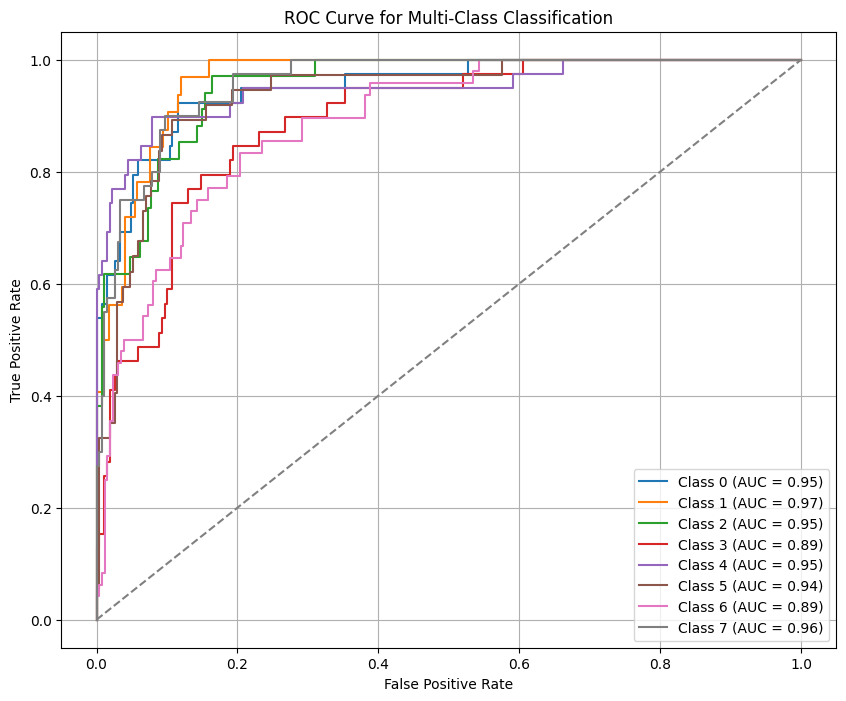

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the model's predictions
y_pred_prob = model.predict(X_test)  # Predicted probabilities for each class
y_test_bin = label_binarize(y_test.argmax(axis=1), classes=np.arange(y_pred_prob.shape[1]))  # Convert y_test to binary format

# Initialize the plot
plt.figure(figsize=(10, 8))

# Calculate ROC curve for each class
for i in range(y_pred_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and title
plt.title('ROC Curve for Multi-Class Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


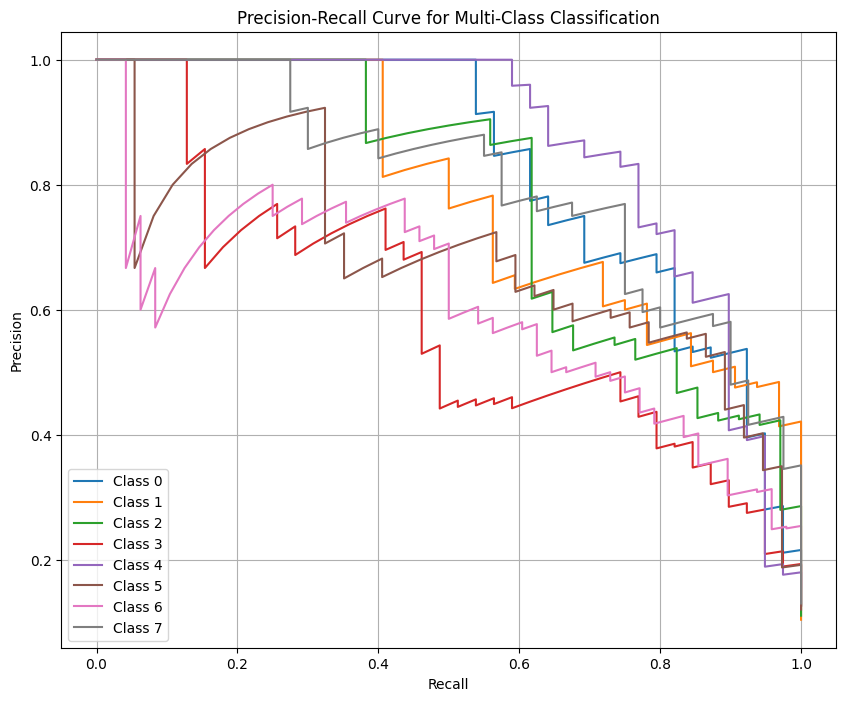

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the model's predictions
y_pred_prob = model.predict(X_test)  # Predicted probabilities for each class
y_test_bin = label_binarize(y_test.argmax(axis=1), classes=np.arange(y_pred_prob.shape[1]))  # Convert y_test to binary format

# Initialize the plot
plt.figure(figsize=(10, 8))

# Calculate Precision-Recall curve for each class
for i in range(y_pred_prob.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

# Labels and title
plt.title('Precision-Recall Curve for Multi-Class Classification')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
